<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
'Colab Notebooks'	 iris.data	    'Sin ordenar'
 curriculum.pdf		 iris.names	     test.csv
'Documentos utiles'	 LiFE		     train.csv
 EBSCO			'Plan de estudios'   Valhalla23.csv
 EGSGLP			 PlayDataset.csv     wine.data
 Fotos			 Portugues	     wine.names
 gender_submission.csv	'Servicio Social'


Se importan las librerias para análisis de datos y visualización de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la base de datos

Se importan los datasets

In [124]:
df_train = pd.read_csv('train.csv', names = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"])
df_train = df_train.iloc[1: , :]
df_train.head
df_train.shape
df_gender = pd.read_csv('gender_submission.csv',names = ["PassengerId","Survived"])
df_gender = df_gender.iloc[1: , :]
df_gender.head
df_gender.shape
df_test = pd.read_csv('test.csv',names = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"])
df_test = df_test.iloc[1: , :]
df_test.head
df_test.shape
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


¿Cuantos NaNs hay por columna?

In [ ]:
x = {}
for ii in df_train:
  x[ii] = df_train[ii].isnull().sum().sum()
print(x)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


De esto se interpreta que no es apropiado eliminar los renglones con NaNs en su totalidad, puesto que la columna Fare tiene 687 datos Null, y por ende el número total de datos bajaría de eliminar estos renglones. Por lo anterior, se aplica drop a la columna Fare, pues no presenta relevancia.

In [ ]:
df_train = df_train.drop(columns = "Cabin")

In [132]:
df_train = df_train.dropna()

Se hace un scatter para observar la distribución de datos de 

([], <a list of 0 Text major ticklabel objects>)

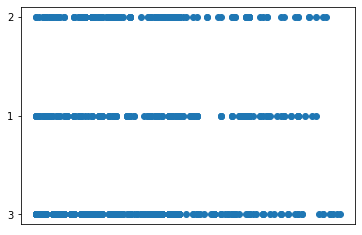

In [ ]:
plt.scatter(df_train["Age"],df_train["Pclass"])
plt.xticks(range(100, 5))

De este histograma se encuentra que se tiene un ligero sesgo hacia la derecha en las edades

(array([125., 102., 117.,  76., 132.,  31.,  43.,  44.,  29.,  13.]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

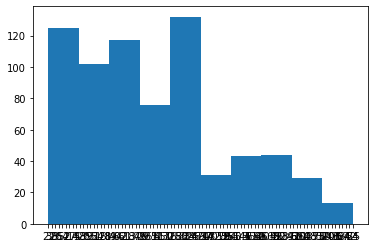

In [ ]:
plt.hist(df_train["Age"])

Se observa que la tercera clase es la que más datos tiene

(array([355.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 173.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

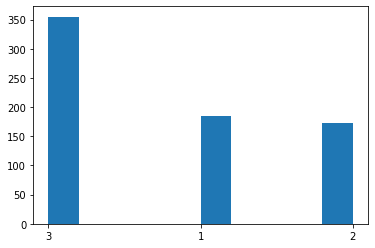

In [ ]:
plt.hist(df_train["Pclass"])

Hubieron más fallecidos que sobrevivientes.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

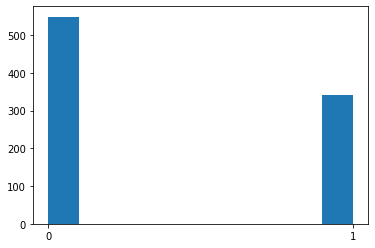

In [125]:
plt.hist(df_train["Survived"])

Se explora sobrevivientes en grupo o solos

In [127]:
sns.barplot('SibSp','Survived',data = df_train)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

# Machine learning con librerias

Dado que estados resultantes de las predicciones son solo vivo y muerto, se considera que un clasificador binario como regresión logistica podría ser útil.

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [148]:
logit = LogisticRegression()
X = df_train[['Age']]
y = df_train[['Survived']]
logit.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [150]:
df_test = df_test.dropna()
logit.predict(df_test[['Age']])

array(['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)